In [1]:
import torch
import torch.nn as nn
import numpy as np

#for printing out status reports
import sys

import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

# Create temporal sequence data

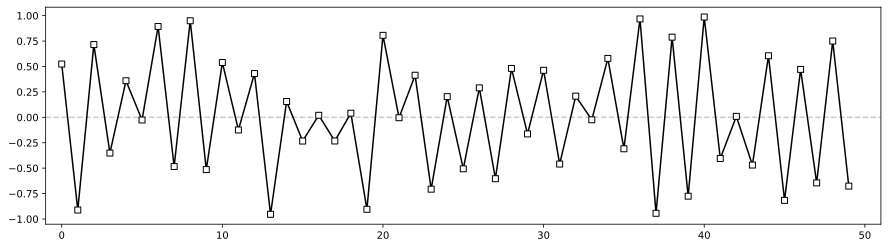

torch.Size([50])


In [2]:
#import the data
N = 50

data = torch.zeros(N)
for i in range(N):
    data[i] = torch.rand(1) * (-1)**i

plt.figure(figsize=(15,4))
plt.plot([-1,N+1],[0,0],'--',color=[.8,.8,.8])
plt.plot(data,'ks-',markerfacecolor='w')
plt.xlim([-1,N+1])
plt.show()
print(data.shape)

# Create a class for the DL Model

In [3]:
class rnnnet(nn.Module):
  def __init__(self):
    super().__init__()

    # RNN layer

    self.rnn = nn.RNN(input_size,num_hidden,num_layers)

    # linear layer for output
    self.out = nn.Linear(num_hidden,1)

  def forward(self,x):
      print(x.shape)

      #initialize hidden state for first input
      hidden = torch.zeros(num_layers,batchsize,num_hidden)
      print(hidden.shape)

      # run through the rnn layer
      y,hidden = self.rnn(x)

      return y,hidden

In [4]:
# network parameters
input_size = 3
num_hidden = 3
num_layers = 1
seqlength = 10
batchsize = 1

# create an instance of the model and inspect
net = rnnnet()

X = torch.rand(seqlength,batchsize,input_size)
y,h = net(X)
print(X.shape)
print(y.shape)
print(h.shape)



torch.Size([10, 1, 3])
torch.Size([1, 1, 3])
torch.Size([10, 1, 3])
torch.Size([10, 1, 3])
torch.Size([1, 1, 3])


In [5]:
# test the model with some data
y = net(data[:input_size].view(1,1,input_size))[0]

lossfun  = nn.MSELoss()
lossfun(y,data[input_size+1].view(1,1,1))


torch.Size([1, 1, 3])
torch.Size([1, 1, 3])


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1, 1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor(0.2084, grad_fn=<MseLossBackward0>)

## Train the model and show performance

In [6]:
# number of training epochs
numepochs = 30

# create a new instance of the model
net = rnnnet()
optimizer = torch.optim.SGD(net.parameters(),lr=.001)

#initialize losses
losses = np.zeros(numepochs)
signaccuracy = np.zeros(numepochs)

# loop over epochs
for epochi in range(numepochs):

    # loop over 'batches'
    batchlosses = []
    batchacc = []
    for timei in range(N-input_size):

        # grab a snippet of data
        X = data[timei:timei+input_size].view(1,batchsize,input_size)
        y = data[timei+input_size].view(1,1,1)

        # forward pass and loss
        yHat,_ = net(X)
        loss = lossfun(yHat,y)


        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batchlosses.append(loss.item())

        # get sign accuracy
        truesign = np.sign(torch.squeeze(y).numpy())
        predsign = np.sign(torch.squeeze(yHat).detach().numpy())
        accuracy = 100*np.mean(truesign==predsign)

        batchacc.append(accuracy)

    
    losses[epochi] = np.mean(batchlosses)
    signaccuracy[epochi] = np.mean(batchacc)

    
    msg = f'Finished epoch {epochi+1}/{numepochs}'
    sys.stdout.write('\r' + msg)

torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 1, 1])) that is different to the input size (torch.Size([1, 1, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
Finished epoch 1/30torch.Size([1, 1, 3])
torch.Size([1, 1, 3])
torch.Size([1

In [7]:
# examine the input and output in more detail

X = data[timei:timei+input_size].view(1,1,input_size)
y = data[timei+input_size].view(1,1,1)

print(X)
print(y)
print(' ')
print(data[timei:timei+input_size+1])

tensor([[[ 0.4712, -0.6452,  0.7501]]])
tensor([[[-0.6765]]])
 
tensor([ 0.4712, -0.6452,  0.7501, -0.6765])


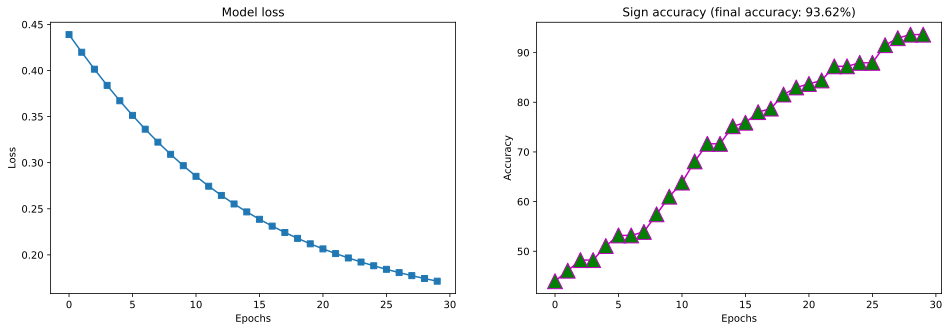

In [8]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses,'s-')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')

ax[1].plot(signaccuracy,'m^-',markerfacecolor='g',markersize=15)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Sign accuracy (final accuracy: %.2f%%)'%signaccuracy[-1])

plt.show()